In [1]:
%pip install ipykernel numpy pandas matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


# Дані
# Підготовчий етап

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.cluster import MiniBatchKMeans, Birch

In [3]:
def plot_confusion_matrix(confusion_matrix):
    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

def print_accuracy(y_test, y_pred, name="Model"):
    print("-"*60, f"{name}\n", sep='\n')
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}\n")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    plot_confusion_matrix(confusion_matrix(y_test, y_pred))

Перші 5 рядків:


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


------------------------------------------------------------
Інформація про дані:
<class 'pandas.core.frame.DataFrame'>
Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1

None

------------------------------------------------------------
Описова статистика:


,count,mean,std,min,25%,50%,75%,max
points,129971.0,88.447138,3.039730,80.0,86.0,88.0,91.0,100.0
price,120975.0,35.363389,41.022218,4.0,17.0,25.0,42.0,3300.0


------------------------------------------------------------
Пропуски в даних:
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64


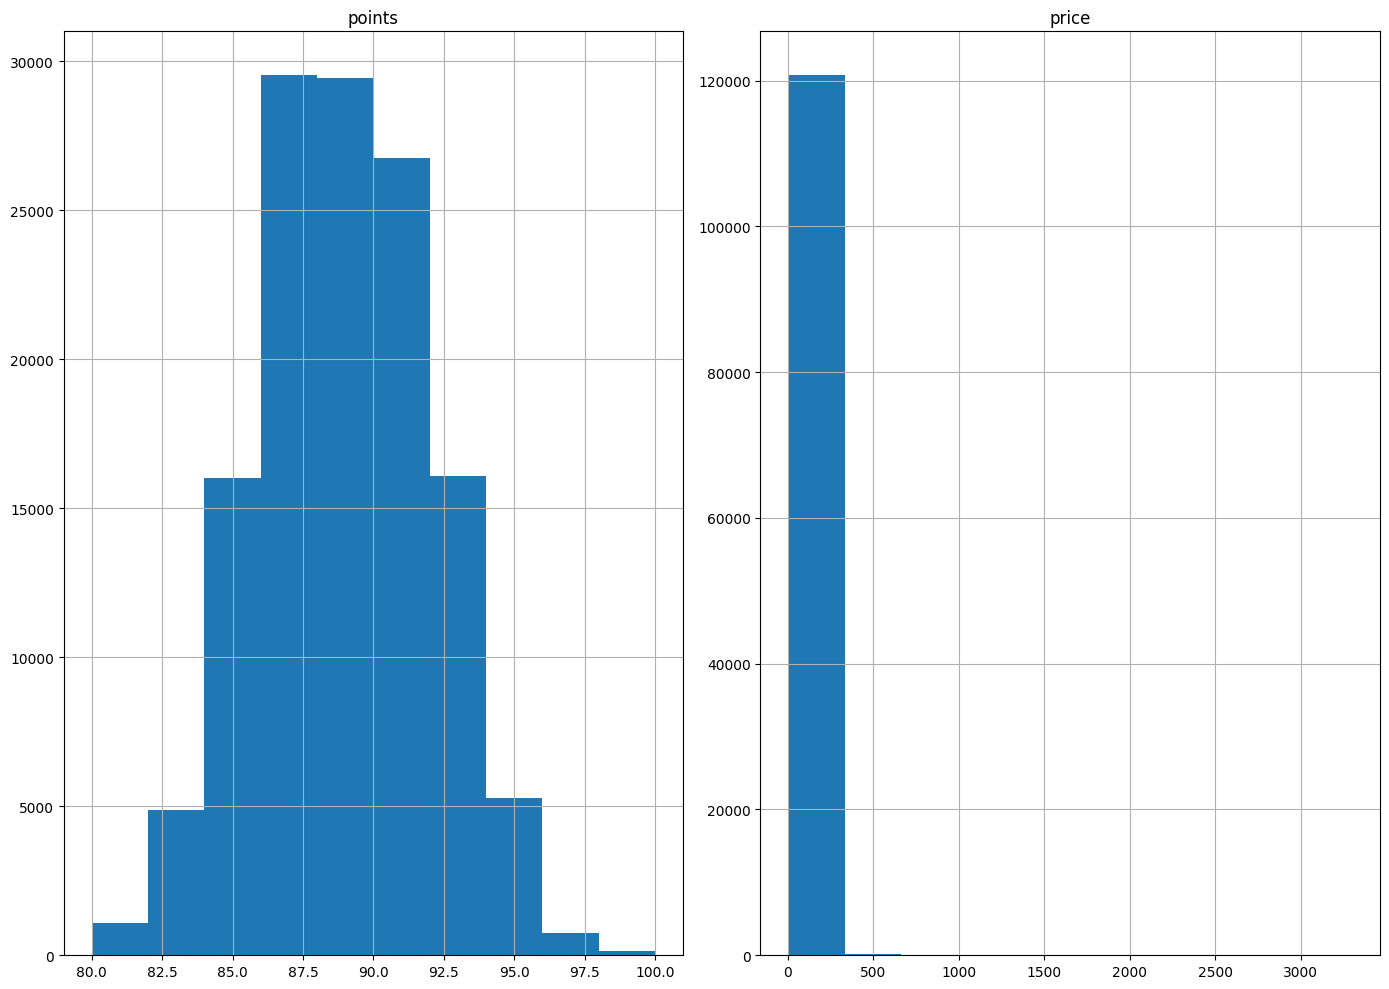

In [4]:
filename = "data/winemag-data-130k-v2.csv"
data = pd.read_csv(filename, index_col=0)

print("Перші 5 рядків:")
display(data.head())

print("-"*60, "Інформація про дані:", sep='\n')
display(data.info())

print("-"*60, "Описова статистика:", sep='\n')
display(data.describe().T)

print("-"*60, "Пропуски в даних:", sep='\n')
print(data.isnull().sum())

data.hist(figsize=(14,10))
plt.tight_layout()
plt.show()

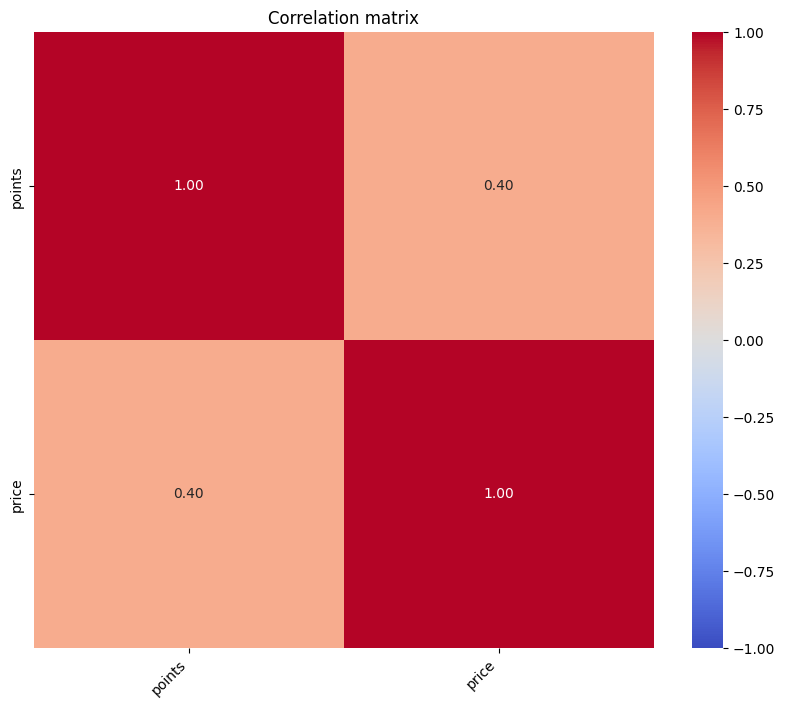

In [5]:
price_median = data.loc[data["price"] > 0, "price"].median()
data.loc[data["price"].isnull(), "price"] = price_median

data_ = data[["points", "price"]]#[:30_000]

corr = data_.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.xticks(rotation=45, ha='right')
plt.title('Correlation matrix')
plt.show()

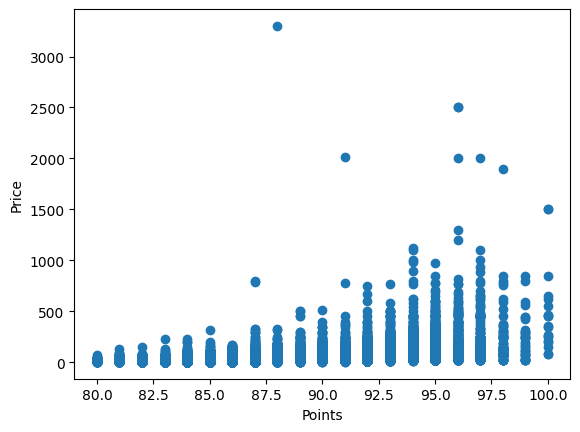

In [6]:
scaler = StandardScaler()
plt.scatter(*data_.to_numpy().T)
plt.xlabel("Points")
plt.ylabel("Price")
plt.show()
X_scaled = scaler.fit_transform(data_)

# Реалізація моделі

Вивчити засади роботи з методами без учителя та основні методи для розв'язання задачі кластеризації. Написати код для кластеризації для обраного набору даних та підбір оптимальної кількості кластерів (реалізувати алгоритм кластеризації KMeans на NumPy)

На максимальну оцінку також продемонструвати роботу ще двох на вибір алгоритмів кластеризації з бібліотеки Sklearn.

In [7]:
class KMeans:
    def __init__(self, cluster_counts=3, iterations=300, tol=1e-4):
        self.k = cluster_counts
        self.iterations = iterations
        self.tol = tol
        self.centroids = None
        self.labels = None

    def fit(self, X):
        idx = np.random.choice(len(X), self.k, replace=False)
        self.centroids = X[idx]

        for i in range(self.iterations):
            distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
            
            self.labels = np.argmin(distances, axis=1)

            new_centroids = np.array([X[self.labels == j].mean(axis=0) for j in range(self.k)])

            if np.all(np.abs(new_centroids - self.centroids) < self.tol):
                print(f"[Early Stopping] Iteration: {i}")
                break
                
            self.centroids = new_centroids

    def predict(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

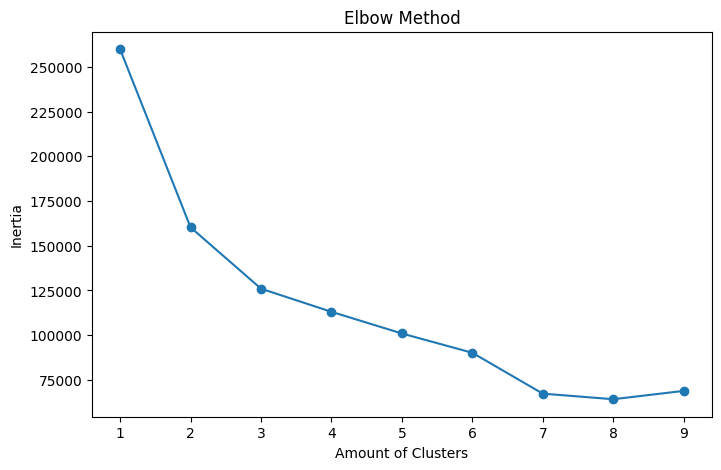

In [8]:
inertia = []
K_range = range(1, 10)
for k in K_range:
    model = MiniBatchKMeans(n_clusters=k, n_init=3, random_state=42)
    model.fit(X_scaled)
    inertia.append(model.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Amount of Clusters')
plt.ylabel('Inertia')
plt.show()

Інерція різко стає повільною на к = 7, беремо таку к

In [9]:
optimal_k = 7
my_kmeans = KMeans(cluster_counts=optimal_k)
my_kmeans.fit(X_scaled)

[Early Stopping] Iteration: 66


In [10]:
minibatch = MiniBatchKMeans(n_clusters=optimal_k, n_init=3)
minibatch_labels = minibatch.fit_predict(X_scaled)

birch = Birch(n_clusters=optimal_k, branching_factor=100)
birch_labels = birch.fit_predict(X_scaled)


# Аналіз результатів
1. Вибір оптимальної кількості кластерів
2. Оцінка результатів роботи кластеризації при різній кількості кластерів
3. Результати оформити протоколом

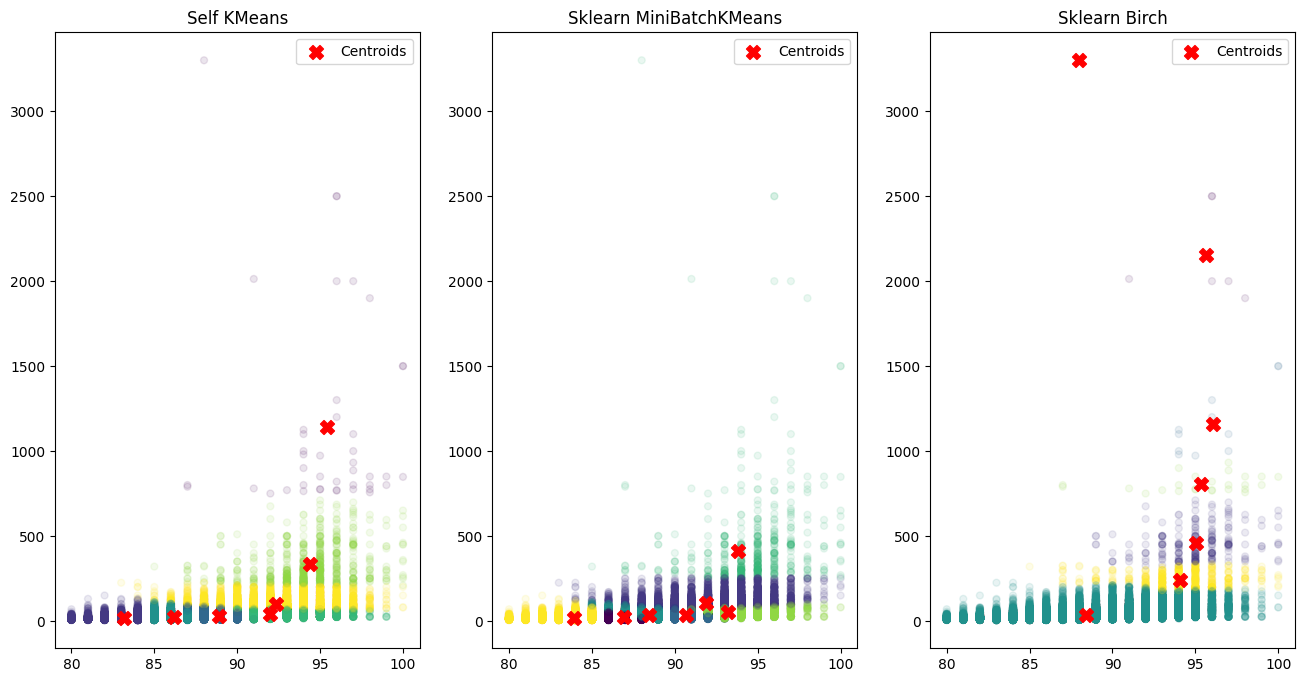

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(16, 8))

size_standart = 25
size_cross = 100
alpha=0.1
cmap = 'plasma'
cmap = 'viridis'

axes[0].scatter(*data_.to_numpy().T, c=my_kmeans.labels, cmap=cmap, s=size_standart, alpha=alpha)
axes[0].set_title("Self KMeans")
centroids = scaler.inverse_transform(my_kmeans.centroids)
axes[0].scatter(*centroids.T, s=size_cross, c='red', marker='X', label='Centroids')
axes[0].legend()

axes[1].scatter(*data_.to_numpy().T, c=minibatch_labels, cmap=cmap, s=size_standart, alpha=alpha)
axes[1].set_title("Sklearn MiniBatchKMeans")
centroids = scaler.inverse_transform(minibatch.cluster_centers_)
axes[1].scatter(*centroids.T, s=size_cross, c='red', marker='X', label='Centroids')
axes[1].legend()

axes[2].scatter(*data_.to_numpy().T, c=birch_labels, cmap=cmap, s=size_standart, alpha=alpha)
axes[2].set_title("Sklearn Birch")
centroids = np.array([X_scaled[birch_labels == j].mean(axis=0) for j in range(optimal_k)])
centroids = scaler.inverse_transform(centroids)
axes[2].scatter(*centroids.T, s=size_cross, c='red', marker='X', label='Centroids')
axes[2].legend()

plt.show()

# Контрольні питання
1. **Як працюють методи машинного навчання без учителя?**  
Головна відмінність від навчання з учителем - у даних немає правильних відповідей. Алгоритм отримує лише вхідні дані і повинен сам знайти в них структуру.  
Принцип роботи:  
    - **Пошук схожості**: Алгоритм аналізує властивості об'єктів і обчислює відстань між ними;
    - **Групування**: Об'єкти, які знаходяться близько один до одного у просторі ознак, об'єднуються в кластер;
    - **Виявлення закономірностей**: Алгоритм намагається мінімізувати відмінності всередині групи і максимізувати відмінності між різними групами.

2. **Критерій оптимальної кількості кластерів?**  
    - **Elbow Method**: Цей метод базується на метриці Inertia (або Within-Cluster Sum of Squares), сумі квадратів відстаней від кожної точки до центру її кластера.
        - Критерій: Оптимальним вважається точка, де різке падіння помилки змінюється на повільне. Це компроміс між стисненням даних і точністю.
    - **Silhouette Score**: Показує, наскільки об'єкт схожий на свій кластер у порівнянні з іншими кластерами. Значення від -1 до 1.
        - Критерій: Чим ближче до 1, тим краще розбиття.